In [101]:
import pandas as pd
df= pd.read_csv('211210-DRM-total.csv')
metal_df= df.iloc[:,25:70]
for k,i in enumerate(metal_df.columns):
    print(i, end=', ')

Al2O3_Gamma, Al2O3_Alpha, Al2O3_Mesoporous, BN, LaNi0.9Ru0.1O3, LaNi0.8Ru0.2O3, La3.5Ru4O3, Sr0.92Y0.08Ti1.95Rh0.05O3, La2NiO4, LaCoO3, LaCuO3, LaRuO3, LaNiO3, LaMnO3, LaNiCoMnO3, La2Ni0.5F0.5O4, LaNi0.5Fe0.5O3, LaNi0.8Zn0.2O3, LaNi0.6Zn0.4O3, LaNi0.4Zn0.6O3, LaNi0.2Zn0.8O3, LaZnO3, La2O3, SBA-15, BaO, CaO, MgO, MgO_Nanocrystalline, MgAl2O4(nanocry), CeO2, SiO2, TiO2, PrO2, V2O5, ZrO2, nanocrystalline_ZrO2, MnO, MCM-41, Y2O3, ZSM-5, MgAlOx, CoOx, Si3N4, H-ZSM-5, Ce0.8Pr0.2O2, 

In [102]:
import pandas as pd
from model_vae_1_new import CVAE, cvae_loss
df = pd.read_csv('211210-DRM-total.csv')
metal_df = df.iloc[:,2:25] # 23
reaction_df = df.iloc[:,76:] # 9

## 간단하게 z값이 어떻게 나오는지에 대해 생각해보기

In [103]:
metal_df = metal_df.to_numpy()
reaction_df = reaction_df.to_numpy()

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,c_train,c_test = train_test_split(metal_df,reaction_df,random_state=21, test_size = 0.4)
x_val,x_test,c_val,c_test = train_test_split(x_test,c_test,random_state = 21, test_size = 0.5)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_c = MinMaxScaler()
x_train = scaler_x.fit_transform(x_train)
c_train = scaler_c.fit_transform(c_train)
x_val,x_test = [scaler_x.transform(x) for x in [x_val,x_test]]
c_val,c_test = [scaler_c.transform(c) for c in [c_val,c_test]]

In [111]:
import torch
x_dim = x_train.shape[1]
c_dim = c_train.shape[1]
model = CVAE(x_dim=x_dim,c_dim = c_dim)
x_train,c_train = [torch.tensor(train,dtype = torch.float32) for train in [x_train,c_train]]

In [ ]:
x_hat,mu,logvar =model(x_train,c_train)

In [115]:
z = model.reparameterize(mu,logvar)

In [126]:
z= z.detach().cpu().numpy()

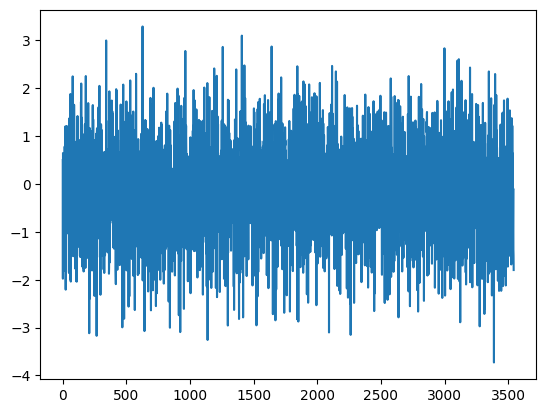

In [128]:
import matplotlib.pyplot as plt
plt.plot(z[:,2])
plt.show()